# **Laporan Project Kursus LSP Data Science**
Nama  : William Devin Septianus Pranggono  
Kelas : 4IA06  
NPM   : 51421517

## **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## **Business Understanding**

### **Latar Belakang**

Pendidikan merupakan hal yang penting bagi manusia untuk meningkatkan mutu kehidupan dan mendapatkan kemampuan yang dapat bermanfaat bagi kelangsungan hidup pribadi maupun orang lain. Oleh karena itu, mutu pendidikan harus ditingkatkan untuk menjamin bahwa siswa mendapatkan keterampilan sehingga dapat berkontribusi dan berkarya dalam lingkungan masyarakat.

Tingkat sekolah menengah atas (SMA) merupakan tingkat yang krusial, karena performa belajar siswa turut menentukan langkah selanjutnya dalam dunia pendidikan, yaitu universitas, yang akan menentukan profesi dan jalan hidup mereka. Oleh karena itu, diperlukan penelitian untuk menentukan faktor yang paling berpengaruh terhadap kinerja belajar siswa.

Menurut Yandi *et al.* (2023), mutu pendidikan yang baik dapat dilihat dari hasil belajar yang telah dicapai siswa, dan dapat dikatakan tercapai apabila siswa telah mendapatkan perkembangan yang diharapkan pada tujuan pembelajaran, yang dapat dibuktikan dengan nilai ujian yang ditempuh.

Performa siswa dapat dipengaruhi oleh berbagai faktor, seperti motivasi belajar siswa dan lingkungan keluarga. Menurut Mawarsih *et al*. (2013), motivasi belajar yang kuat dalam diri siswa dapat mendorong siswa untuk lebih bersemangat dalam belajar dan meraih prestasi belajar yang optimal. Sedangkan, peran keluarga khususnya orang tua dalam mendukung proses belajar siswa juga sangat penting, seperti menyediakan fasilitas atau lingkungan belajar yang nyaman dan pendekatan orang tua dalam mendidik dan membimbing siswa.

Pendidikan yang maju turut serta meningkatkan kualitas SDM manusia, yang dapat memberi dampak yang besar bagi masyarakat dan negara. Peran orang tua dan tenaga pendidik sangat penting untuk memastikan performa belajar siswa.

### **Problem Statements**

* Faktor apa yang paling berpengaruh terhadap prestasi belajar siswa?
* Apa grade yang mungkin didapatkan siswa berdasarkan nilai variabel tertentu?

### **Goals**

* Mengetahui fitur yang paling berpengaruh terhadap GPA atau Grade siswa.
* Membuat model yang dapat memprediksi Grade siswa berdasarkan fitur-fitur yang ada.

### **Solution Statements**

* Menggunakan Dummy Classifier pada library Scikit-Learn sebagai model baseline.
* Menggunakan algoritma KNN, XGBoost, Random Forest Classifier, dan Neural Network untuk mencari model dengan metrik optimal.
* Mencari parameter terbaik dengan algoritma Grid Search.
* Melakukan percobaan struktur model Neural Network dengan satu dan dua layer.

## **Data Understanding**

### **Tentang Dataset**

Dataset ini mengandung informasi komprehensif dari 2,392 siswa menengah atas, berisi detil dari demografi, kebiasaan belajar, keterlibatan orang tua, aktivitas ekstrakurikuler, dan performa akademik. Variabel target, GradeClass, mengklasifikasikan nilai siswa menjadi beberapa kategori, menyediakan dataset yang solid untuk penelitian edukasional, permodelan prediktif, dan analisis statistik.

[Dataset](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset?resource=download) diambil dari Kaggle.

### **Variabel-Variabel yang Digunakan pada Dataset**

1. Student ID  
StudentID: ID unik untuk tiap siswa (1001 to 3392).

2. Age : Usia siswa dengan rentang 15 hingga 18 tahun.

3. Gender: Gender siswa, 0 untuk pria dan 1 untuk wanita.

4. Ethnicity: Etnis siswa dengan detil seperti berikut.  
0: Caucasian  
1: African American  
2: Asian  
3: Other  

5. ParentalEducation: tingkat pendidikan orang tua dengan detil seperti berikut.  
0: None  
1: High School  
2: Some College  
3: Bachelor's  
4: Higher  

6. StudyTimeWeekly: Jam belajar siswa per minggu (dalam satuan jam), dengan rentang 0 hingga 20.

7. Absences: Jumlah absensi siswa selama 1 tahun pembelajaran, dengan rentang 0 hingga 30.

8. Tutoring: Partisipasi pada program tutoring, 0 untuk "Tidak" dan 1 untuk "Ya".

9. ParentalSupport: Level dukungan orang tua, dengan detil seperti berikut.  
0: None  
1: Low  
2: Moderate  
3: High  
4: Very High  

10. Extracurricular: Partisipasi pada aktivitas ekstrakurikuler, 0 untuk "Tidak" dan 1 untuk "Ya".

11. Sports: Partisipasi pada aktivitas olah raga, 0 untuk "Tidak" dan 1 untuk "Ya".

12. Music: Partisipasi pada aktivitas musik, 0 untuk "Tidak" dan 1 untuk "Ya".

13. Volunteering: Partisipasi pada aktivitas sukarelawan, 0 untuk "Tidak" dan 1 untuk "Ya".

14. GPA: Grade Point Average dengan skala maksimum 4.0.

15. GradeClass: Klasifikasi tingkat nilai siswa berdasarkan GPA, dengan detil seperti berikut.  
0: 'A' (GPA >= 3.5)  
1: 'B' (3.0 <= GPA < 3.5)  
2: 'C' (2.5 <= GPA < 3.0)  
3: 'D' (2.0 <= GPA < 2.5)  
4: 'E' (GPA < 2.0)

### **Data Analysis**

#### **Import Data**

In [2]:
df = pd.read_csv('Student_performance_data _.csv')

#### **Data Inspection**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [6]:
df.duplicated().sum()

0

Tidak ada nilai *null* dan *record* duplikat.

Beberapa hal yang perlu dilakukan adalah sebagai berikut.  
a. Menghilangkan data *outliers* (jika ada).  
b. Menerjemahkan fitur-fitur kategorikal untuk kemudahan penyampaian informasi pada grafik.

#### **Data Cleaning**

##### **Translate the Categorical Values**

In [7]:
df_translated = df.copy()

In [8]:
# Replace Gender Values
df_translated["Gender"] = df_translated["Gender"].replace({0:"Male", 1:"Female"})

# Replace Ethnicity
df_translated["Ethnicity"] = df_translated["Ethnicity"].replace({0:"Caucasian", 1:"African American",
                                           2:"Asian", 3:"Other"})

# Replace Parental Education
df_translated["ParentalEducation"] = df_translated["ParentalEducation"].replace({0:"None", 1:"High School",
                                                           2:"Some College", 3:"Bachelor's",
                                                           4:"Higher"})

# Replace Tutoring Status
df_translated["Tutoring"] = df_translated["Tutoring"].replace({0:"No", 1:"Yes"})

# Replace Parental Involvement
df_translated["ParentalSupport"] = df_translated["ParentalSupport"].replace({0:"None", 1:"Low",
                                                                             2:"Moderate", 3:"High",
                                                                             4:"Very High"})

# Replace Extracurricular Status
df_translated["Extracurricular"] = df_translated["Extracurricular"].replace({0:"No", 1:"Yes"})

# Replace Sports Status
df_translated["Sports"] = df_translated["Sports"].replace({0:"No", 1:"Yes"})

# Replace Music Status
df_translated["Music"] = df_translated["Music"].replace({0:"No", 1:"Yes"})

# Replace Volunteering Status
df_translated["Volunteering"] = df_translated["Volunteering"].replace({0:"No", 1:"Yes"})

# Replace GradeClass
df_translated["GradeClass"] = df_translated["GradeClass"].replace({0:"A", 1:"B",
                                                                   2:"C", 3:"D",
                                                                   4:"E"})

In [9]:
df_translated.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,C
1,1002,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,B
2,1003,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,E
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,D
4,1005,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,E


##### **Delete Outliers**

In [10]:
num_columns = [c for c in df_translated.columns if df_translated[c].dtype in ["int64", "float64"]]
num_columns

['StudentID', 'Age', 'StudyTimeWeekly', 'Absences', 'GPA']

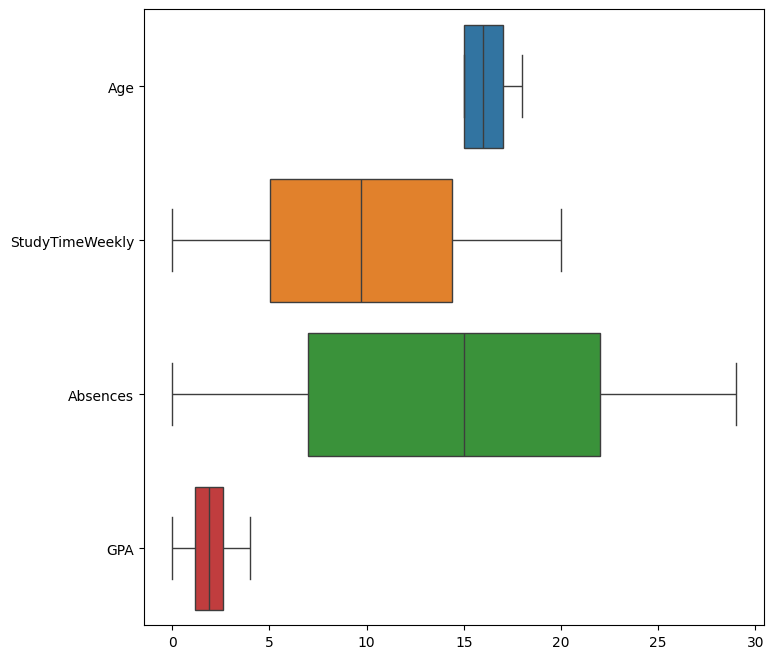

In [11]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_translated[num_columns[1:]], orient='h')
plt.show()

Berdasarkan boxplot, tidak terdapat *outliers* pada data numerik.

##### **Checking GPA Consistency**

In [12]:
def grading(gpa) :
    if gpa >= 3.5 :
        return 0
    elif 3.0 <= gpa < 3.5 :
        return 1
    elif 2.5 <= gpa < 3.0 :
        return 2
    elif 2.0 <= gpa < 2.5 :
        return 3
    else :
        return 4

In [13]:
df['GradeFromGPA'] = df['GPA'].apply(grading)

In [14]:
print(f"Jumlah data = {len(df)}")
print(f"Jumlah data dengan Grade yang sesuai persyaratan = {len(df.loc[df['GradeClass'] == df['GradeFromGPA']])}")

Jumlah data = 2392
Jumlah data dengan Grade yang sesuai persyaratan = 2224


In [15]:
df.drop(columns='GradeFromGPA', inplace=True)

In [16]:
df['GradeClass'] = df['GPA'].apply(grading)

#### **EDA dan Visualisasi**

##### **Distribusi Data**

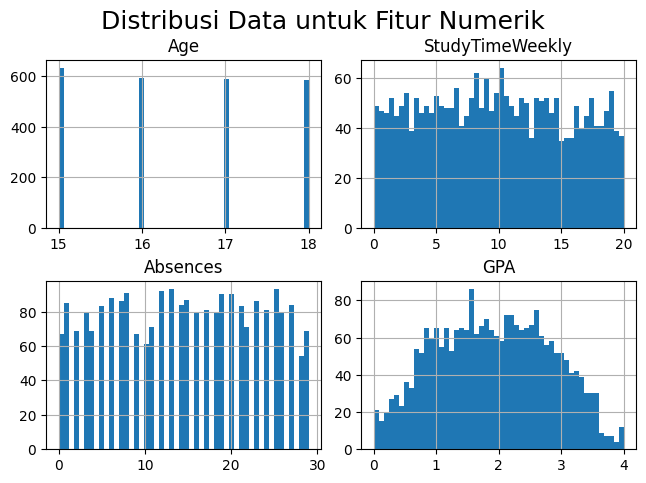

In [17]:
df_translated[num_columns[1:]].hist(bins=50)
plt.suptitle("Distribusi Data untuk Fitur Numerik", fontsize=18)
plt.tight_layout(pad=0.5)
plt.show()

Berdasarkan plot tersebut, dapat disimpulkan bahwa persebaran nilai *StudyTimeWeekly*, *Absences*, dan *Age* menunjukkan distribusi seragam (*uniform*), sedangkan persebaran GPA mengikuti distribusi normal (*Gaussian*).

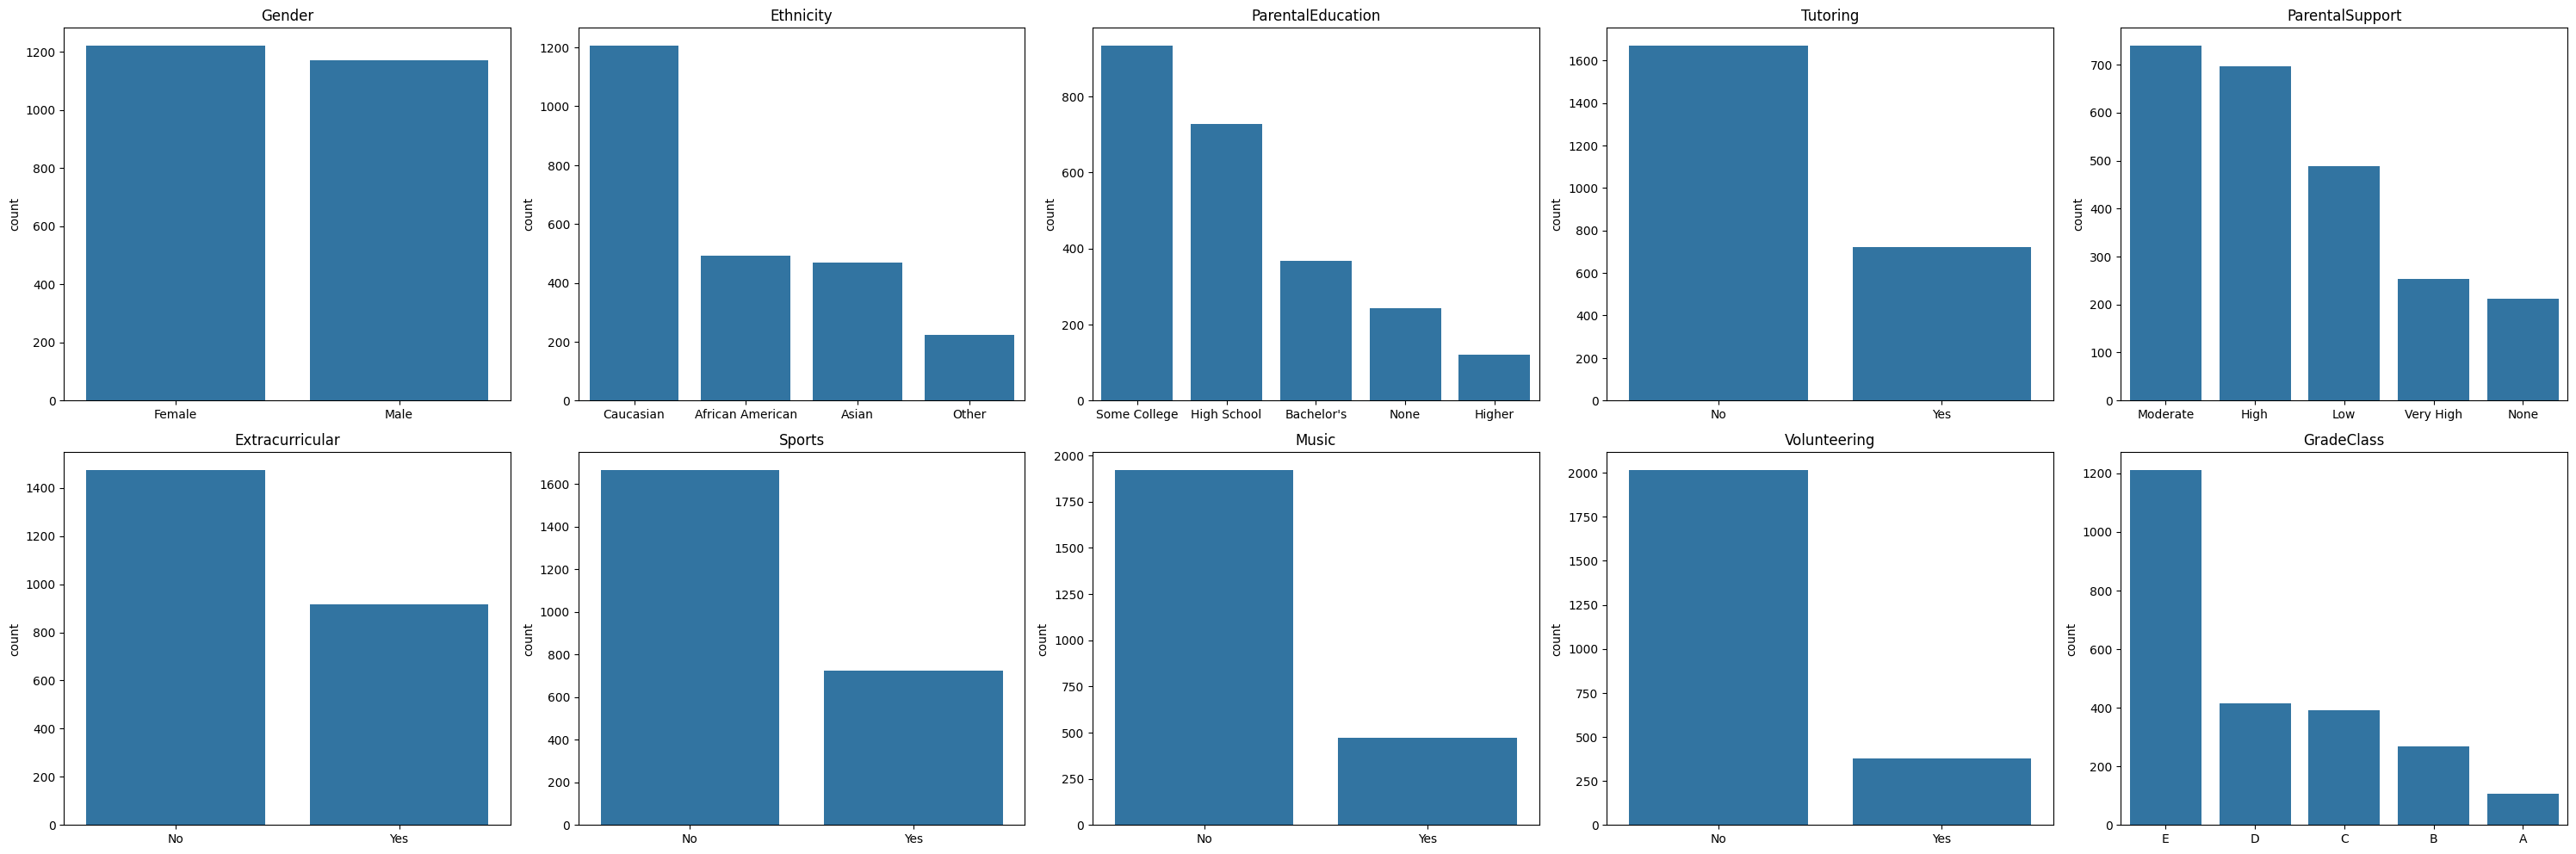

In [18]:
plt.figure(figsize=(30,10))
for i, c in enumerate(df_translated.loc[:, ~df_translated.columns.isin(num_columns)].columns) :
    data_each_col = df_translated[c].value_counts().sort_values(ascending=False)
    plt.subplot(2, 5, i+1)
    sns.barplot(data=data_each_col, legend=False)
    plt.xlabel(None)
    plt.title(c)
plt.tight_layout(pad=1)
plt.show()

Berdasarkan *plot* tersebut, dapat disimpulkan bahwa :

a. Tingkat dukungan orang tua didominasi kelas *Moderate* dan *High*.

b. Sebagian besar latar belakang pendidikan orang tua siswa adalah hanya menghadiri beberapa perkuliahan dan sekolah menengah atas.

c. Terdapat ketidakseimbangan jumlah siswa menurut etnis yang didominasi *Caucasian*.

d. Jumlah siswa yang tidak mengikuti kegiatan di luar kelas (ekskul, olah raga, dan sebagainya) lebih banyak daripada mereka yang mengikuti kegiatan.

e. Sebagian besar siswa pada dataset memiliki *grade* E di kelas.

##### **Analisis Fitur Age**

In [19]:
df_translated.groupby('Age').agg({'GPA':'mean'}).sort_values(by='GPA', ascending=False)

,GPA
Age,
17,1.927030
16,1.907534
15,1.898509
18,1.892101


Siswa dengan kelompok usia 17 tahun memiliki rata-rata GPA tertinggi. Namun, perbedaannya dengan kelompok usia lain relatif sedikit.

##### **Analisis Fitur Gender**

In [20]:
df_translated.groupby('Gender').agg({'GPA':'mean'})

,GPA
Gender,
Female,1.894225
Male,1.918679


Siswa laki-laki memiliki rata-rata GPA yang sedikit lebih tinggi daripada siswa perempuan.

##### **Analisis Fitur Ethnicity**

In [21]:
df_translated.groupby('Ethnicity').agg({'GPA':'mean'}).sort_values(by='GPA', ascending=False)

,GPA
Ethnicity,
Other,1.947696
African American,1.946437
Asian,1.922125
Caucasian,1.875905


Etnis African American dan Other (lainnya) memiliki rata-rata GPA yang lebih tinggi daripada etnis lainnya.

##### **Analisis Fitur Parental Education**

In [22]:
df_translated.groupby('ParentalEducation').agg({'GPA':'mean'}).sort_values(by='GPA', ascending=False)

,GPA
ParentalEducation,
High School,1.944022
Some College,1.929881
None,1.893045
Higher,1.815812
Bachelor's,1.809082


Siswa dengan latar belakang pendidikan orang tua High School memiliki rata-rata GPA tertinggi. Dapat disimpulkan bahwa latar belakang pendidikan orang tua tidak memiliki pengaruh yang signifikan terhadap GPA siswa.

##### **Analisis Fitur Parental Support**

In [23]:
df_translated.groupby('ParentalSupport').agg({'GPA':'mean'}).sort_values(by='GPA', ascending=False)

,GPA
ParentalSupport,
Very High,2.191545
High,2.042409
Moderate,1.884246
Low,1.755700
None,1.540128


Peranan orang tua dalam mendukung pendidikan anak mereka sangat penting. Hal ini dibuktikan dengan rata-rata GPA yang semakin tinggi diiringi dengan tingkat dukungan orang tua yang semakin tinggi.

##### **Analisis Fitur Study Time Weekly**

In [24]:
df_translated.groupby('GradeClass').agg({'StudyTimeWeekly':'mean'})

,StudyTimeWeekly
GradeClass,
A,11.854926
B,11.122335
C,10.106404
D,9.757963
E,9.184822


Siswa dengan Grade yang lebih tinggi memiliki waktu belajar per minggu yang lebih lama.

##### **Korelasi Antar Fitur**

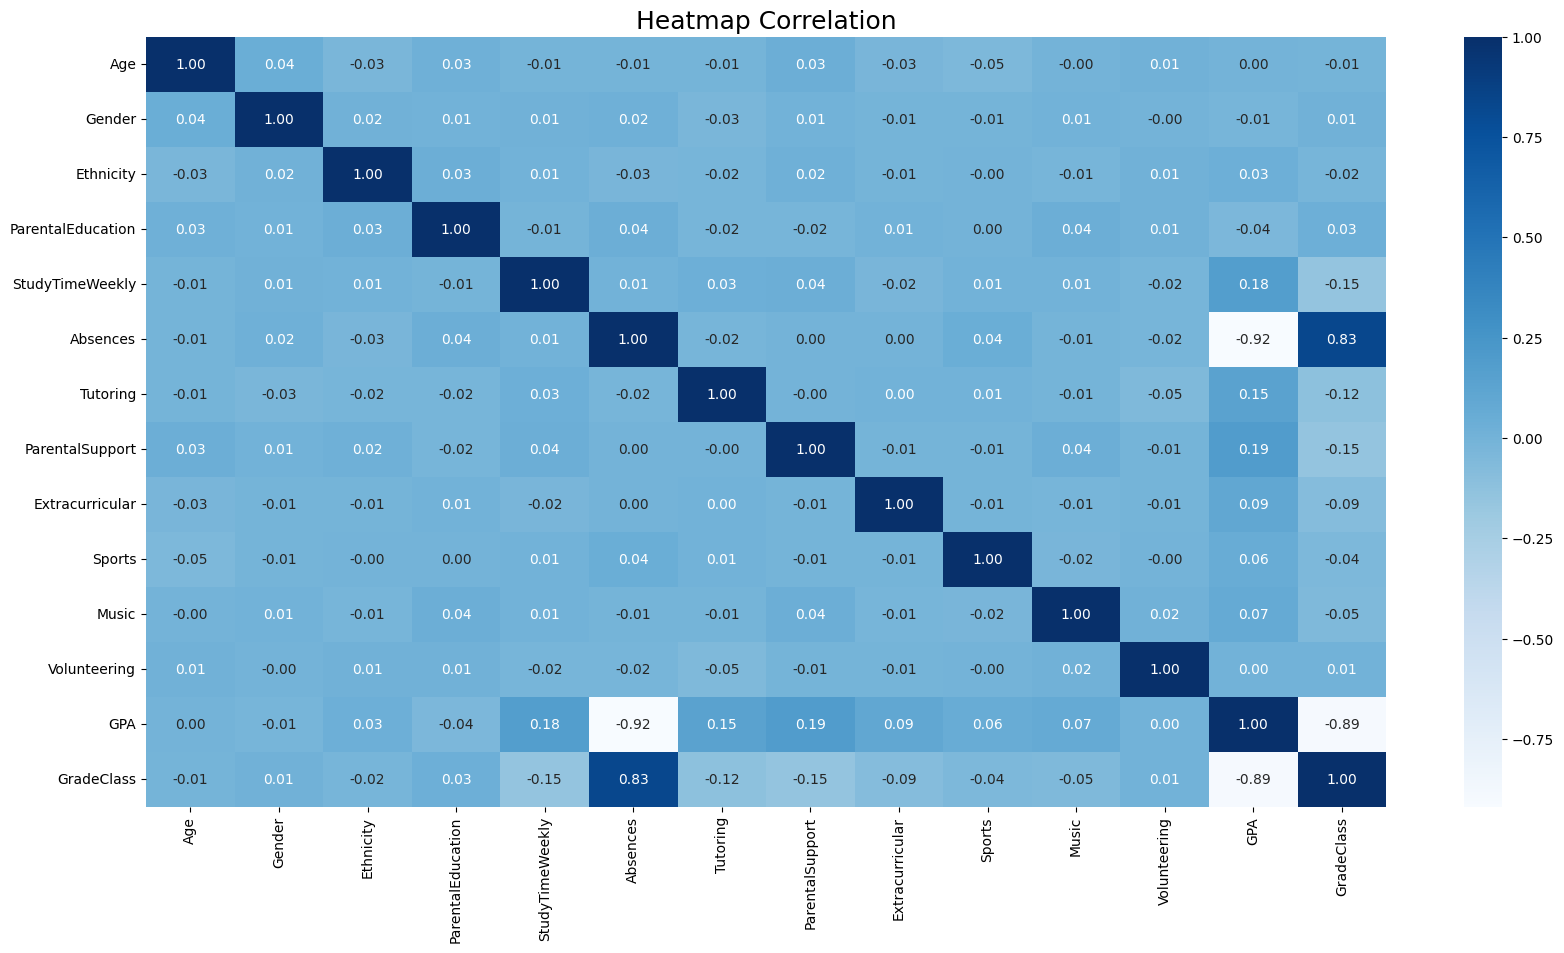

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title("Heatmap Correlation", fontsize=18)
plt.show()

Berdasarkan *heatmap* tersebut, dapat disimpulkan bahwa faktor absensi memiliki korelasi negatif yang kuat terhadap GPA, dengan nilai korelasi -0.92. Berarti, siswa yang sering tidak hadir di kelas cenderung memiliki nilai GPA yang rendah.

## **Data Preparation**

### **Drop Kolom StudentID dan GPA**

In [26]:
df.drop(columns=['StudentID', 'GPA'], inplace=True)

In [27]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GradeClass'],
      dtype='object')

### **Memisahkan Fitur dan Label**

In [28]:
X = df.drop(columns='GradeClass')
y = df['GradeClass']

### **Membagi Data Training dan Data Testing**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

### **Normalisasi Data**

In [30]:
mm = MinMaxScaler()
mm.fit(X_train[X_train.columns])

MinMaxScaler()

In [31]:
X_train[X_train.columns] = mm.transform(X_train[X_train.columns])
X_test[X_test.columns] = mm.transform(X_test[X_test.columns])

In [32]:
for c in X_train.columns :
  if len(X_train[c].unique()) == 2 :
    X_train[c] = X_train[c].astype("int64")
    X_test[c] = X_test[c].astype("int64")

### **Penjelasan (Additional Rubric)**

* Kolom StudentID sebaiknya dibuang karena hanya berfungsi sebagai pengidentifikasi unik untuk setiap siswa. Sedangkan, kolom GPA dapat dibuang karena pembuatan model akan berfokus pada masalah klasifikasi.
* Pemisahan fitur/variabel dan label diperlukan untuk melatih model.
* Selanjutnya, data dibagi ke dalam data *training* dan data *testing* dengan ukuran 80% untuk data *training*. Parameter *stratify=y* menyatakan bahwa distribusi pada data *training* dan data *testing* harus sesuai dengan distribusi data keseluruhan.
* Normalisasi data dengan MinMaxScaler untuk mengubah skala data dengan rentang 0 dan 1. Normalisasi diperlukan untuk membantu model Deep Learning / Machine Learning untuk mencapai *loss* minimum dengan lebih cepat.

## **Modelling**

Pada tahap modelling, hal pertama yang perlu dilakukan adalah menentukan model baseline sebagai acuan dasar untuk menentukan apakah model Machine Learning yang akan dipakai dapat mempelajari sesuatu dari data dan memprediksi data dengan tepat.

Kemudian, untuk algoritma KNN, Random Forest, dan XGBoostClassifier, akan dicari hyperparameter terbaik dengan metode Grid Search. Metode ini akan mencoba segala kombinasi dari sekumpulan hyperparameter yang diberikan dan menentukan model dengan hyperparameter terbaik berdasarkan score yang ditentukan.

Score yang penulis gunakan pada Grid Search adalah F1 Weighted. Mengingat distribusi data yang tidak seimbang (imbalanced), metrik ini lebih sesuai untuk digunakan karena merupakan rata-rata harmonic antara precision dan recall untuk setiap kelas yang diberikan bobot sesuai jumlah data. Menggunakan metrik akurasi dapat memberikan evaluasi yang bias terhadap kelas data mayoritas.

### **Baseline**

In [33]:
dummy = DummyClassifier(random_state=0, strategy='stratified')
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

In [34]:
cm_dummy = confusion_matrix(y_test, y_pred)

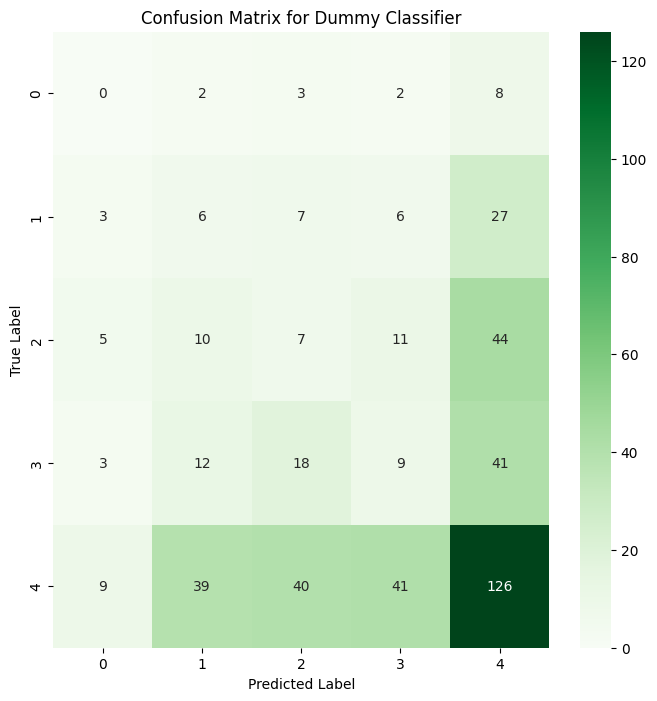

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_dummy, annot=True, cmap='Greens', fmt='.0f')
plt.title("Confusion Matrix for Dummy Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [36]:
dummy_report = classification_report(y_test, y_pred)
print(dummy_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.09      0.12      0.10        49
           2       0.09      0.09      0.09        77
           3       0.13      0.11      0.12        83
           4       0.51      0.49      0.50       255

    accuracy                           0.31       479
   macro avg       0.16      0.16      0.16       479
weighted avg       0.32      0.31      0.31       479



#### **Penjelasan Terkait Model Baseline (Additional Rubric)**

Model baseline dummy classifier dengan strategy stratified memprediksi kelas secara acak dengan probabilitas yang berbeda-beda sesuai dengan distribusi setiap kelas.

Pada model baseline, akurasi yang didapat hanya sebesar 31% pada data testing. Oleh karena itu, untuk menentukan apakah model Machine Learning dapat memprediksi kelas data dengan baik dan mempelajari pola tertentu, maka akurasi yang dihasilkan setidaknya harus lebih baik daripada model baseline.

### **K-Nearest Neighbor**

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn_params = {'n_neighbors': list(range(3, 11)),
              'weights': ['uniform', 'distance']}
knn_gridsearch = GridSearchCV(knn, knn_params, cv=10, scoring='f1_weighted', n_jobs=-1)
knn_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

Hyperparameter yang digunakan adalah n_neighbors, yaitu jumlah titik data yang akan dibandingkan untuk memprediksi data input. Sedangkan parameter weights menentukan bagaimana penentuan prediksi kelas dari suatu titik data. Jika uniform, berarti model tidak memperhitungkan jarak antara K titik data dengan titik data baru, sebaliknya untuk distance.

In [39]:
print(f"Best Params : {knn_gridsearch.best_params_}")
print(f"Best Score : {knn_gridsearch.best_score_}")

Best Params : {'n_neighbors': 5, 'weights': 'distance'}
Best Score : 0.5940910794694625


In [40]:
knn = knn_gridsearch.best_estimator_
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

#### **Penjelasan Terkait Model (Additional Rubric)**

K-Nearest Neighbor memprediksi kelas dari suatu data dengan membandingkan data tersebut dengan K titik data terdekat berdasarkan fitur/atribut yang ada. Penentuan prediksi kelas ditentukan berdasarkan kelas yang paling banyak muncul dari K titik data terdekat tersebut.

Kelebihan dari algoritma K-Nearest Neighbor adalah implementasinya yang lebih mudah karena cara kerja algoritma yang sederhana dan memiliki jumlah hyperparameter yang relatif lebih sedikit daripada algoritma machine learning lainnya.

Sedangkan, kekurangan algoritma K-Nearest Neighbor adalah tidak dapat bekerja dengan optimal untuk dataset berukuran besar, karena biaya komputasi yang mahal untuk menghitung jarak satu titik dengan titik-titik yag lain, sehingga cenderung menurunkan kinerja model.

Referensi :

[LP2M - Algoritma K-Nearest Neighbors (KNN) – Pengertian dan Penerapan](https://lp2m.uma.ac.id/2023/02/16/algoritma-k-nearest-neighbors-knn-pengertian-dan-penerapan/)

### **Random Forest Classifier**

In [41]:
rfc = RandomForestClassifier()

In [42]:
rfc_params = {'n_estimators': [200, 500, 1000],
              'max_depth': [10, 20, 40]}
rfc_gridcv = GridSearchCV(rfc, rfc_params, cv=10, scoring='f1_weighted', n_jobs=-1)

Hyperparameter yang akan dilakukan percobaan adalah n_estimators dan max_depth. Hyperparameter n_estimators menentukan jumlah decision tree, sedangkan max_depth menentukan kedalaman maksimal untuk setiap decision tree.

In [43]:
rfc_gridcv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40],
                         'n_estimators': [200, 500, 1000]},
             scoring='f1_weighted')

In [44]:
print(f"Best Params : {rfc_gridcv.best_params_}")
print(f"Best Score : {rfc_gridcv.best_score_}")

Best Params : {'max_depth': 10, 'n_estimators': 500}
Best Score : 0.7603460788715066


In [45]:
rfc = rfc_gridcv.best_estimator_
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500)

#### **Penjelasan Terkait Model (Additional Rubric)**

Random Forest Classifier bekerja dengan menggabungkan beberapa decision tree untuk memprediksi kelas suatu data. Setiap decision tree dilatih dengan mengambil sebagian dari dataset secara random dan mengambil sebagian fitur dari dataset. Penentuan prediksi kelas ditentukan berdasarkan prediksi kelas terbanyak dari prediksi semua decision tree.

Kelebihan algoritma Random Forest adalah dapat mengurangi risiko overfitting karena keputusan prediksi diagregasi dari setiap decision tree dengan faktor pengambilan keputusan berdasarkan fitur-fitur dan data yang berbeda. Karakteristik ini juga menyebabkan algoritma Random Forest lebih tidak sensitif terhadap perubahan data.

Sedangkan, kekurangan algoritma Random Forest adalah kurang interpretable karena struktur keseluruhan model yang lebih kompleks, dan memerlukan jumlah hyperparameter dengan jumlah yang relatif lebih banyak sehingga perlu dilakukan pemilihan hyperparameter secara hati-hati.

Referensi :

[DQLAB - Algoritma Decision Tree vs Random Forest Machine Learning](https://dqlab.id/algoritma-decision-tree-vs-random-forest-machine-learning#:~:text=Selanjutnya%2C%20Random%20Forest%20juga%20memiliki,keseluruhan%20model%20lebih%20sulit%20dipahami.)

### **XGBoost**

In [46]:
xgb = XGBClassifier()

In [47]:
xgb_params = {'n_estimators':[100, 200, 500, 1000],
              'max_depth':[5, 10, 20],
              'learning_rate':[1e-2, 1e-3, 5e-3]}
xgb_gridsearch = GridSearchCV(xgb, xgb_params, cv=10, scoring='f1_weighted')

Kombinasi hyperparameter yang dicoba adalah sebagai berikut.
* n_estimators : Jumlah pohon iterasi.
* max_depth : Kedalaman maksimum untuk setiap pohon.
* learning_rate : Konstanta yang berfungsi sebagai faktor pengali untuk pengaruh dari prediksi weak model yang baru terhadap prediksi model secara keseluruhan.

In [48]:
xgb_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.001, 0.005],
                         'max_depth': [5, 10, 20],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='f1_weighted')

In [49]:
print(f"Best Params : {xgb_gridsearch.best_params_}")
print(f"Best Score : {xgb_gridsearch.best_score_}")

Best Params : {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
Best Score : 0.7612765246851484


In [50]:
xgb = xgb_gridsearch.best_estimator_
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

#### **Penjelasan Terkait Model (Additional Rubric)**

Algoritma XGBoost bekerja dengan melatih sebuah weak model (biasanya decision tree), kemudian membuat weak model lainnya untuk memperbaiki hasil prediksi weak model sebelumnya. Hal ini dilakukan dengan iterasi tertentu, sehingga hasil prediksi dari weak model terakhir dipengaruhi oleh hasil prediksi weak model sebelumnya.

Kelebihan dari algoritma XGBoost adalah performa yang tinggi dengan menerapkan algoritma boosting dan mengoptimalkan prediksi dengan gradien pada fungsi objektif. Selain itu, algoritma ini dapat diterapkan pada dataset berukuran besar.

Kekurangan dari algoritma XGBoost adalah jumlah hyperparameter yang banyak dan perlu disesuaikan, sehingga memerlukan waktu dan keahlian untuk menemukan hyperparameter yang optimal. Selain itu, algoritma XGBoost memakan biaya komputasi yang mahal.

Referensi :

[DQLAB - Tools Data Science dengan Algoritma XGBoost](https://dqlab.id/tools-data-science-dengan-algoritma-xgboost)

[GeeksforGeeks - XGBoost](https://www.geeksforgeeks.org/xgboost/#)

### **Artificial Neural Network**

Model Neural Network yang akan dibuat memiliki 1 dan 2 Dense Layer. Dense Layer adalah Layer pada neural network yang semua neuronnya terhubung dengan neuron-neuron pada layer sebelumnya dan layer setelahnya. Kemudian, layer Dropout merupakan layer yang menonaktifkan sebagian neuron secara acak setiap pemrosesan batch. Penggunaan dropout dapat mencegah overfitting.
Layer terakhir adalah output dari prediksi model, yaitu probabilitas untuk setiap kelas. Probabilitas tertinggi merupakan prediksi yang dihasilkan model.

Model dilatih dengan optimizer Adam dengan learning rate 0.001, fungsi loss Sparse Categorical Crossentropy, dan metrik akurasi.

#### **a Fully Connected Layer**

In [52]:
nn0 = tf.keras.models.Sequential([
  tf.keras.Input(shape=(len(X_train.columns),)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [53]:
nn0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 2309 (9.02 KB)
Trainable params: 2309 (9.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
nn0.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [55]:
nn0.fit(X_train, y_train, epochs=100,
        validation_data=(X_test, y_test), batch_size=32)

Epoch 1/100


60/60 [==============================] - 7s 36ms/step - loss: 1.3239 - accuracy: 0.5159 - val_loss: 1.1969 - val_accuracy: 0.5324
Epoch 2/100
60/60 [==============================] - 1s 16ms/step - loss: 1.1420 - accuracy: 0.5332 - val_loss: 1.0621 - val_accuracy: 0.5324
Epoch 3/100
60/60 [==============================] - 1s 15ms/step - loss: 1.0035 - accuracy: 0.5525 - val_loss: 0.9436 - val_accuracy: 0.5344
Epoch 4/100
60/60 [==============================] - 1s 15ms/step - loss: 0.8910 - accuracy: 0.6095 - val_loss: 0.8429 - val_accuracy: 0.6180
Epoch 5/100
60/60 [==============================] - 1s 17ms/step - loss: 0.8068 - accuracy: 0.6534 - val_loss: 0.7792 - val_accuracy: 0.6889
Epoch 6/100
60/60 [==============================] - 1s 13ms/step - loss: 0.7429 - accuracy: 0.6827 - val_loss: 0.7300 - val_accuracy: 0.6848
Epoch 7/100
60/60 [==============================] - 1s 16ms/step - loss: 0.6995 - accuracy: 0.7120 - val_loss: 0.6959 - val_accuracy: 0.7203
Epoc

#### **2 Fully Connected Layers**

In [56]:
nn = tf.keras.models.Sequential([
  tf.keras.Input(shape=(len(X_train.columns),)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [57]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1664      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 325       
                                                                 
Total params: 10245 (40.02 KB)
Trainable params: 10245 (40.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
nn.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [61]:
nn.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/100
60/60 [==============================] - 6s 35ms/step - loss: 1.3105 - accuracy: 0.5086 - val_loss: 1.1758 - val_accuracy: 0.5324
Epoch 2/100
60/60 [==============================] - 1s 18ms/step - loss: 1.1068 - accuracy: 0.5484 - val_loss: 0.9528 - val_accuracy: 0.5595
Epoch 3/100
60/60 [==============================] - 1s 18ms/step - loss: 0.8892 - accuracy: 0.6226 - val_loss: 0.7546 - val_accuracy: 0.6430
Epoch 4/100
60/60 [==============================] - 1s 15ms/step - loss: 0.7434 - accuracy: 0.6649 - val_loss: 0.6497 - val_accuracy: 0.7161
Epoch 5/100
60/60 [==============================] - 1s 19ms/step - loss: 0.6615 - accuracy: 0.7114 - val_loss: 0.5892 - val_accuracy: 0.7641
Epoch 6/100
60/60 [==============================] - 1s 16ms/step - loss: 0.6084 - accuracy: 0.7365 - val_loss: 0.5477 - val_accuracy: 0.7766
Epoch 7/100
60/60 [==============================] - 1s 13ms/step - loss: 0.5826 - accuracy: 0.7527 - val_loss: 0.5259 - val_accuracy: 0.7891
Epoch 

#### **Penjelasan Terkait Model (Additional Rubric)**

Artificial Neural Network merupakan algoritma Deep Learning yang meniru cara kerja jaringan saraf manusia. Artificial Neural Network tersusun dari neuron-neuron yang memiliki bobot dan bias. Untuk menghasilkan prediksi, bobot dan bias ini akan disesuaikan dengan meminimumkan fungsi loss.

Kelebihan dari Artificial Neural Network adalah kemampuannya untuk memprediksi berdasarkan data yang rumit, dan dapat memberikan prediksi yang akurat dalam berbagai pengaplikasian.

Kekurangan dari Artificial Neural Network adalah sulit untuk menginterpretasikannya karena kompleksitas perhitungan dan memerlukan sumber daya komputasi yang tinggi untuk melatih model.

Referensi :

[AICI - Neural Network: Dasar-Dasar dan Aplikasinya](https://aici-umg.com/article/neural-network/)

## **Evaluasi**

Metrik evaluasi yang digunakan adalah Precision, Recall, F1 Score, dan Accuracy.

* Precision menggambarkan seberapa tepat model dalam memprediksi data positif (True Positive) dengan benar dari seluruh prediksi positif.
* Recall menggambarkan seberapa banyak data positif (True Positive) yang berhasil diprediksi oleh model dengan benar dari seluruh data positif.
* F1 Score merupakan rata-rata harmonic dari precision dan recall, memberikan gambaran seimbang dari kedua metrik tersebut.
* Akurasi menggambarkan proporsi prediksi yang benar dari keseluruhan prediksi.

### **KNN**

In [62]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.13      0.22        15
           1       0.37      0.29      0.32        49
           2       0.36      0.32      0.34        77
           3       0.33      0.27      0.29        83
           4       0.78      0.92      0.84       255

    accuracy                           0.62       479
   macro avg       0.50      0.39      0.40       479
weighted avg       0.59      0.62      0.59       479



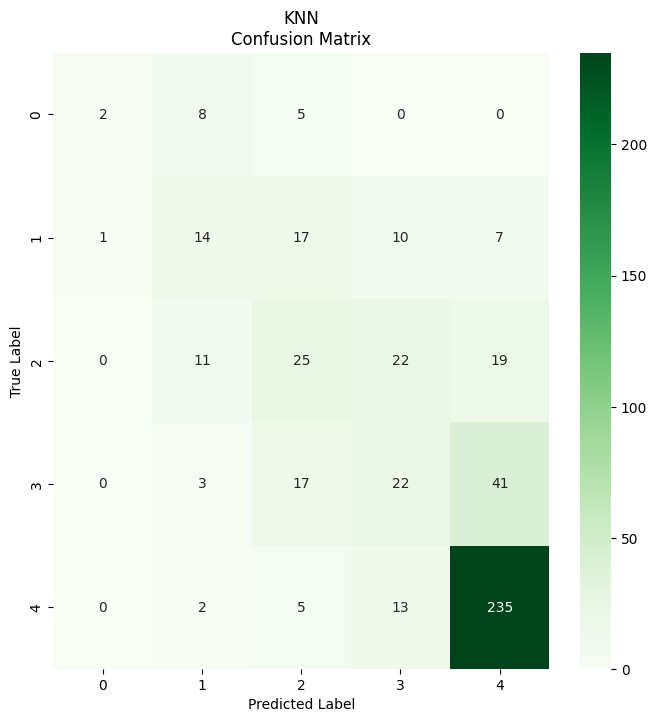

In [63]:
cm_knn = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(cm_knn, annot=True, cmap='Greens', fmt='.0f')
plt.title("KNN\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### **Random Forest Classifier**

In [64]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.13      0.24        15
           1       0.65      0.61      0.63        49
           2       0.61      0.71      0.66        77
           3       0.60      0.48      0.53        83
           4       0.89      0.96      0.93       255

    accuracy                           0.78       479
   macro avg       0.75      0.58      0.60       479
weighted avg       0.78      0.78      0.76       479



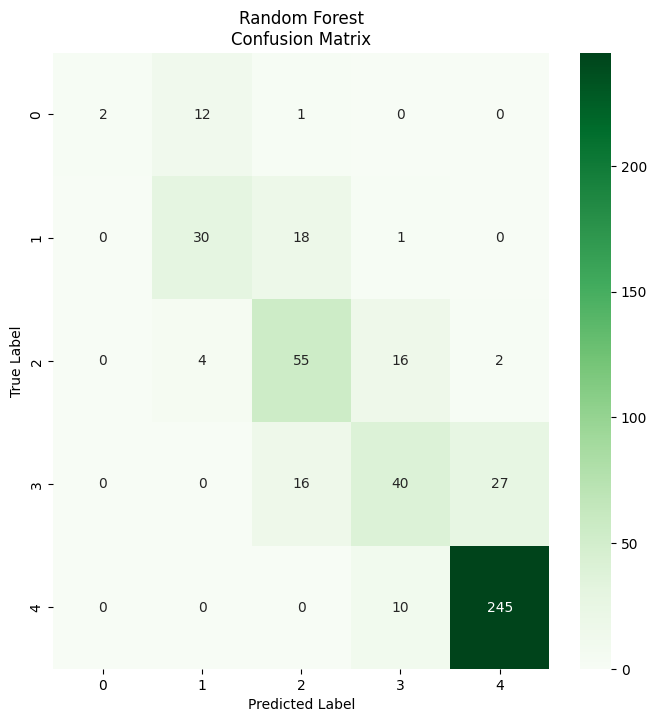

In [65]:
cm_rfc = confusion_matrix(y_test, rfc.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(cm_rfc, annot=True, cmap='Greens', fmt='.0f')
plt.title("Random Forest\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### **XGBoost**

In [66]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52        15
           1       0.62      0.59      0.60        49
           2       0.66      0.64      0.65        77
           3       0.59      0.55      0.57        83
           4       0.90      0.95      0.92       255

    accuracy                           0.78       479
   macro avg       0.67      0.64      0.65       479
weighted avg       0.77      0.78      0.77       479



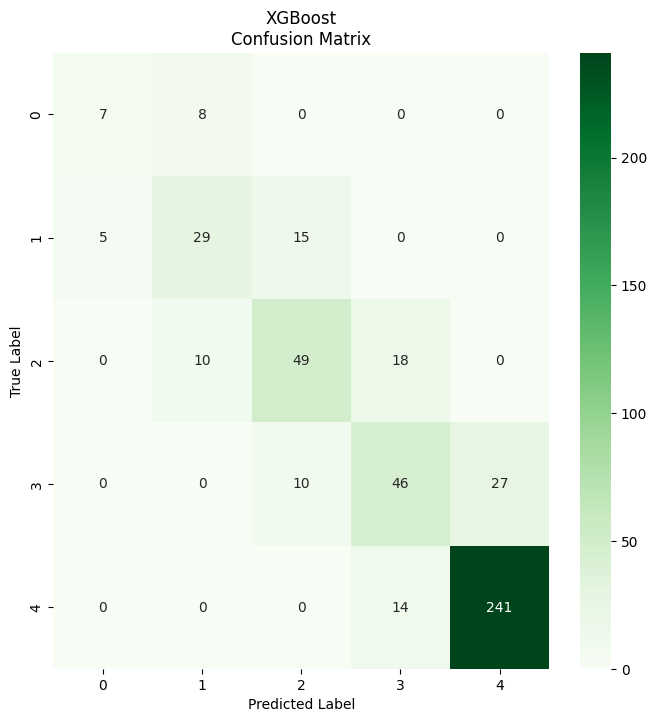

In [67]:
cm_xgb = confusion_matrix(y_test, xgb.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(cm_xgb, annot=True, cmap='Greens', fmt='.0f')
plt.title("XGBoost\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### **Neural Network**

#### **a Layer**

In [68]:
print(classification_report(y_test, np.argmax(nn0.predict(X_test), axis=-1)))

15/15 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        15
           1       0.72      0.69      0.71        49
           2       0.71      0.75      0.73        77
           3       0.61      0.61      0.61        83
           4       0.93      0.93      0.93       255

    accuracy                           0.81       479
   macro avg       0.72      0.70      0.71       479
weighted avg       0.81      0.81      0.81       479



15/15 [==============================] - 0s 9ms/step


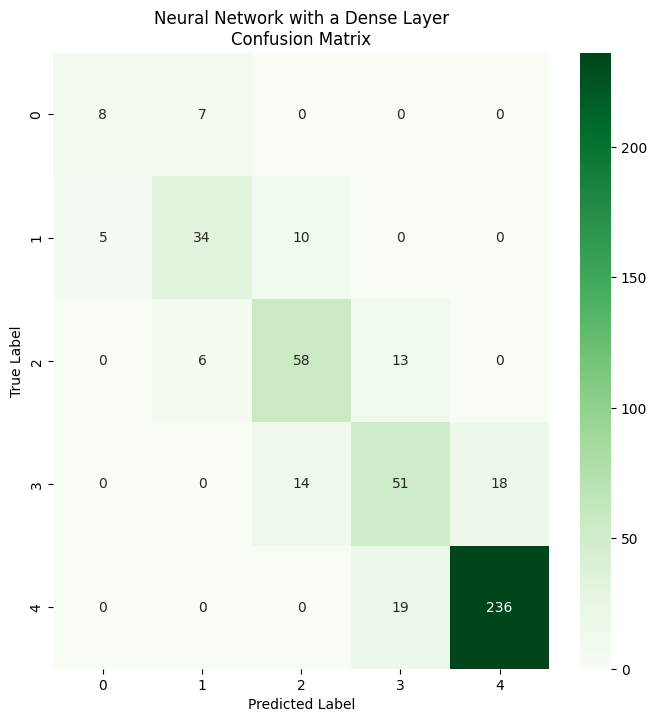

In [69]:
cm_nn0 = confusion_matrix(y_test, np.argmax(nn0.predict(X_test), axis=-1))
plt.figure(figsize=(8,8))
sns.heatmap(cm_nn0, annot=True, cmap='Greens', fmt='.0f')
plt.title("Neural Network with a Dense Layer\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### **Two Dense Layer**

In [70]:
print(classification_report(y_test, np.argmax(nn.predict(X_test), axis=-1)))

15/15 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.76      0.63      0.69        49
           2       0.67      0.73      0.70        77
           3       0.62      0.58      0.60        83
           4       0.92      0.95      0.93       255

    accuracy                           0.81       479
   macro avg       0.73      0.72      0.73       479
weighted avg       0.81      0.81      0.81       479



15/15 [==============================] - 0s 10ms/step


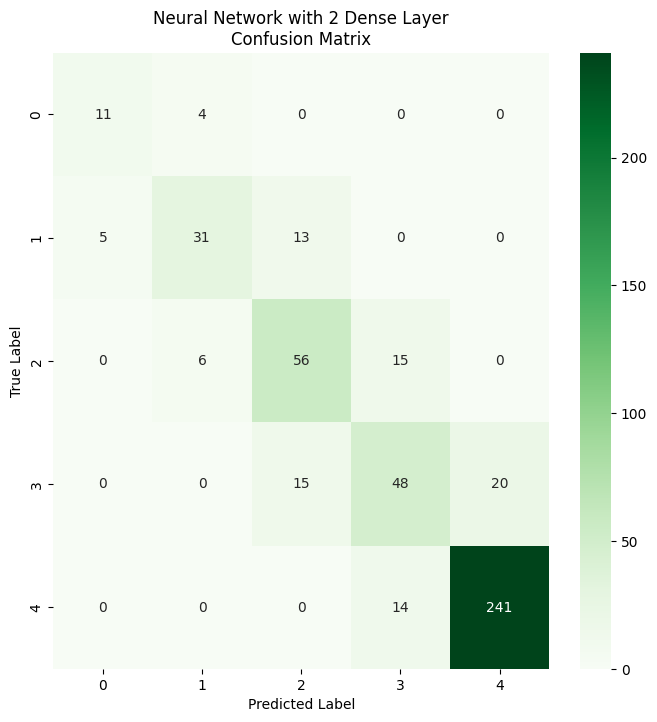

In [71]:
cm_nn = confusion_matrix(y_test, np.argmax(nn.predict(X_test), axis=-1))
plt.figure(figsize=(8,8))
sns.heatmap(cm_nn, annot=True, cmap='Greens', fmt='.0f')
plt.title("Neural Network with 2 Dense Layer\nConfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **Kesimpulan**

1. Berdasarkan metrik evaluasi, dapat disimpulkan bahwa algoritma Artificial Neural Network dengan 2 Dense Layer mampu untuk memberikan hasil prediksi terbaik. Precision, Recall, dan F1 Score untuk setiap kelas menunjukkan performa yang cukup baik. Secara keseluruhan, model ANN dengan 2 Dense Layer memberikan akurasi yang terbaik, yaitu sebesar 81 %. Meskipun model ANN dengan 1 Dense Layer memiliki akurasi yang sama, namun F1 Score model dengan 2 Dense Layer untuk seluruh kelas lebih stabil dibandingkan model dengan 1 Dense Layer, sehingga dapat menggeneralisasi data dengan lebih baik.

2. Faktor absensi dan dukungan orang tua menjadi faktor yang cukup berpengaruh terhadap prestasi siswa. Oleh karena itu, penting bagi orang tua untuk memberikan dukungan baik secara fisik ataupun mental kepada anak-anak mereka dalam kegiatan pembelajaran. Faktor absensi menjadi faktor terkuat dalam prestasi siswa. Peran sekolah dan guru diperlukan dalam hal pengawasan absensi siswa.

In [73]:
nn.save('student_prediction.h5')

C:\Users\User\anaconda3\envs\trileven\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Daftar Pustaka**

[1] Yandi, A., Putri, A.N.K. and Putri, Y.S.K., 2023. Faktor-Faktor Yang Mempengarui Hasil Belajar Peserta Didik (Literature Review). Jurnal Pendidikan Siber Nusantara, 1(1), pp.13-24.

[2] Mawarsih, S.E. and Hamidi, N., 2013. Pengaruh perhatian orang tua dan motivasi belajar terhadap prestasi belajar siswa sma negeri jumapolo. Jupe-Jurnal Pendidikan Ekonomi, 1(3).